<a href="https://colab.research.google.com/github/khushiyadav03/Machine-Learning/blob/main/Random_Forest_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [29]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [30]:
# Display the first 5 rows of the DataFrame to get a glimpse of the data
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
# Check the dimensions of the DataFrame (number of rows and columns)
df.shape

(891, 15)

In [32]:
# Get descriptive statistics of the numerical columns to understand the data distribution
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Preprocessing

In [33]:
# Check for missing values in each column
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [34]:
# Fill missing 'age' values with the mean of the 'age' column
# This is a common strategy for handling missing numerical data
df['age'].fillna(df['age'].mean(), inplace=True)

/tmp/ipython-input-3467784966.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [35]:
# Drop the 'deck' column as it has too many missing values and might not be useful for prediction
df.drop('deck', axis=1, inplace=True)

In [36]:
# Fill missing 'embarked' values with the mode (most frequent value) of the 'embarked' column
# This is a common strategy for handling missing categorical data
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2327635977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [37]:
# Convert categorical features ('sex', 'embarked') into numerical representations using one-hot encoding
# This is necessary for machine learning models that require numerical input
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [38]:
# Drop irrelevant columns that are not needed for the model
df.drop(['passengerId', 'name', 'ticket', 'class', 'who', 'adult_male', 'alive', 'embark_town', 'alone'], axis=1, inplace=True, errors='ignore')

In [39]:
# Display the first 5 rows of the DataFrame after preprocessing to see the changes
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [40]:
# Define features (X) and target (Y)
# X contains all columns except 'survived', which is our target variable Y.
X = df.drop('survived', axis=1)
Y = df['survived']

In [41]:
# Split the data into training and testing sets
# We split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [42]:
# Print the shapes of the training and testing sets
# This confirms the split was performed correctly.
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [43]:
# Initialize the Random Forest Classifier model
# We are using a Random Forest model for classification. n_estimators is set to 100, meaning we will use 100 decision trees in the forest.
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [44]:
# Train the model
# We train the model using the training data.
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Make predictions on the test set
# We use the trained model to predict the survival outcomes on the unseen test data.
Y_pred = model.predict(X_test)

In [46]:
# Calculate and print the accuracy of the model
# Accuracy is the proportion of correctly predicted outcomes in the test set.
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [47]:
# Print the classification report
# This report shows the precision, recall, and F1-score for each class (Survived and Not Survived), providing a more detailed evaluation than just accuracy.
print(classification_report(Y_test, Y_pred, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       105
    Survived       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [48]:
# Print the confusion matrix
# The confusion matrix shows the number of correct and incorrect predictions for each class.
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[90 15]
 [20 54]]


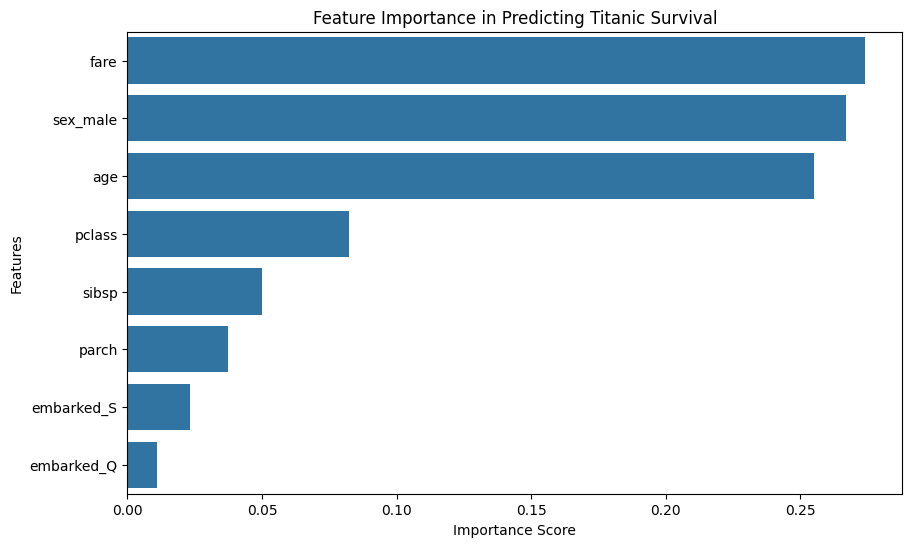

In [49]:
# Visualize feature importance
# This helps us understand which features were most influential in the model's predictions.
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Predicting Titanic Survival')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()